In [1]:
import numpy as np
np.random.seed(0)

In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy
from tqdm.notebook import tqdm

In [3]:
class Layer:
    def __init__(self,input_dim,output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.W = 0.10 * np.random.randn(output_dim,input_dim)
        self.X = None
    def forward(self,input):
        pass
    def backward(self,output_grad,lr):
        pass
    
class HiddenLayer(Layer):
    def __init__(self,input_dim,output_dim,activation):
        super().__init__(input_dim,output_dim)
        self.b = np.random.randn(output_dim,1)
        self.activation = activation
                
    def forward(self,X,  training = True):
        # save x only if learning
        if training:
            self.X = X
       # print('X'+str(X.shape))
        #print('W'+str(self.W.shape))
        #print('b'+str(self.b.shape))
        z = self.W @ X + self.b
        # send to activation function
        out = self.activation.forward(z)
        return out
    
    def backward(self,v,lr):
        in_grad_W, in_grad_X, in_grad_b = self.activation.backward( v,self.X,self.W,self.b)
        self.W -= lr*grad_W
       # print('b'+str(self.b.shape))
       # print('grad_b'+str(grad_b.shape))
        self.b -= lr*grad_b
        v = grad_X
        return v 

class OutputLayer(Layer):
    def __init__(self,input_dim,output_dim,loss_f):
        super().__init__(input_dim,output_dim)
        self.loss_f = loss_f

                
    def forward(self,X, training = True):
        if training:
            self.X = X
        out = self.loss_f.forward(X,self.W)
        return out
    
    
    def backward(self,C,lr):
        grad_W, grad_X = self.loss_f.backward(self.X,self.W,C)
       # print("W"+ str(self.W.shape))
       # print("grad_W"+ str(grad_W.shape))
        self.W -= lr*grad_W.T
        v = grad_X
        return v 

    def get_loss(self,X,C):
      #  print(self.loss_f.calc_loss(self.X, C)  )
        return self.loss_f.calc_loss(X, C)    


In [ ]:
class ResNetLayer(HiddenLayer):
    def __init__(self,dim ,activation):
        super().__init__(dim,dim,activation)
        self.activation = activation
        self.W2 = 0.10 * np.random.randn(dim,dim)
        
                
    def forward(self,X,  training = True):
        z = super().forward(X,  training )
        out = X + self.W2 @ z
        return out
    
    def backward(self,v,lr):
        grad_W,grad_X,grad_b = self.activation.backward( v,self.X,self.W,self.b)
        self.W -= lr*grad_W
       # print('b'+str(self.b.shape))
       # print('grad_b'+str(grad_b.shape))
        self.b -= lr*grad_b
        v = grad_X

In [71]:
np.divide(np.eye(5),8+np.ones((5,5)))

array([[0.11111111, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11111111, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.11111111, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.11111111]])

In [84]:
c = np.random.randn(5,5)

In [86]:

a = np.ones((5,5))*3 * c
b = np.ones((5,5))*2
a @ b

array([[  7.36731401,   7.36731401,   7.36731401,   7.36731401,
          7.36731401],
       [-13.39617921, -13.39617921, -13.39617921, -13.39617921,
        -13.39617921],
       [-13.04549842, -13.04549842, -13.04549842, -13.04549842,
        -13.04549842],
       [ -4.97358729,  -4.97358729,  -4.97358729,  -4.97358729,
         -4.97358729],
       [-12.04999196, -12.04999196, -12.04999196, -12.04999196,
        -12.04999196]])

In [87]:
a = np.ones((5,5))*3 
b = np.ones((5,5))*2 * c
a @ b

array([[-20.293109  , -22.39457944, -16.36441871,  24.18299086,
         -1.22882658],
       [-20.293109  , -22.39457944, -16.36441871,  24.18299086,
         -1.22882658],
       [-20.293109  , -22.39457944, -16.36441871,  24.18299086,
         -1.22882658],
       [-20.293109  , -22.39457944, -16.36441871,  24.18299086,
         -1.22882658],
       [-20.293109  , -22.39457944, -16.36441871,  24.18299086,
         -1.22882658]])

In [83]:
np.random.randn(5,5)

array([[-0.09002106, -0.71791731, -0.05212406,  0.96184108,  1.51160395],
       [ 0.79921726,  1.285745  , -1.19901605, -1.34365708,  0.09816774],
       [ 1.54156024,  0.36944916,  1.01030383, -0.0825162 , -0.68882103],
       [ 1.491447  , -0.68155992,  0.4116795 ,  1.12577797, -0.22849607],
       [ 1.21895662, -0.27045625,  0.43866853, -1.29219614, -0.42082524]])

In [64]:
class a:
    def __init__(self):
        self.a = 2
        
    def f(self,s):
        print(self.a)
        
class b(a):
    def __init__(self):
        super().__init__()
        self.b = 9
        
    def f(self,s,s2):
        super().f(s)
        print(self.b)
        
        
aa = b() 

In [65]:
aa.f(1,1)

2
9


In [4]:
class Activation:
    def __init__(self,activation,activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
        self.z = None
        
    def forward(self,z):
        self.z = z        
      #  print('tanh'+str(self.activation(self.z).shape))
        return self.activation(self.z)
    
    def backward(self, v,X,W,b):
       # print("self.activation_prime(self.z)" + str(self.activation_prime(self.z).shape))
       # print("v" + str(v.shape))
        grad = np.multiply(self.activation_prime(self.z),v)
        grad_b = np.sum(grad,axis = 1).reshape(-1,1)
        grad_X = W.T @ grad
        grad_W = grad @ X.T
     #   print("grad_b" + str(grad_b.shape))
     #   print("grad_X" + str(grad_X.shape))
     #   print("grad_W" + str(grad_W.shape))
        return grad_W,grad_X,grad_b
    
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x:1-np.tanh(x)**2
        super().__init__(tanh,tanh_prime)

In [5]:
class Softmax:
    def __init__(self):
      #  self.X = None 
       # self.w = None  
        self.out = None
        
    def forward(self,X,W):
        product_Xw = X.T @ W.T
        exp = np.exp(product_Xw - np.max(product_Xw ))
        div = np.divide(exp, np.sum(exp, axis = 1).reshape(-1,1))
        self.out = div 
        return self.out
        
    def calc_loss(self,X, C):
        #cross entrophy loss
        log  = np.log(self.out)
        m = len(X[0])
        return -np.sum(C*log)/m  
    
    def backward(self,X,W, C):
        m = len(X[0])
       # print('softmax-out '+ str((self.out).shape))
       # print('C'+ str((C).shape))
        sub =  self.out - C
        grad_W  = (1/m)*(X @ sub)
        grad_X  = (1/m)*(W.T @ sub.T)
        return  grad_W, grad_X



In [6]:
class Net:
    def __init__(self,layers,lr=0.01):
        self.lr = lr
        self.layers = layers
        self.loss = 0
    
    def forward(self,X,C = None, training = True, update_loss = True):
        '''
        forward pass of the network
        '''
        output = X
        for layer in self.layers:
            output = layer.forward(output, training)
         
        if update_loss:
            batch_loss = self.layers[-1].get_loss(output, C)
            self.loss += batch_loss
        return output
    

    def backward(self,C):
        '''
        backward pass through the network + updating params
        '''
        
        v = self.layers[-1].backward(C,self.lr)
        
        for layer in np.flip(self.layers[:-1]):
          #  print('v' + str(v.shape))
            v = layer.backward(v, self.lr)
            
    def predict(self,X):
        prob = self.forward(X,training = False, update_loss = False)
        output = (prob == prob.max(axis=1)[:,None]).astype(int)
        return output


In [7]:
def accuracy(pred, true):
    div = np.divide(pred + true,2).astype(int)
    output = np.sum(div)/len(div)
    return output

In [8]:
def data_loader(file_name):
    mat = scipy.io.loadmat(file_name)
    Xtrain = mat.get('Yt')
    # for the bias
    Xtrain = np.vstack([Xtrain, np.ones(Xtrain.shape[1])]) 
    Ytrain = mat.get('Ct')
    Xtest = mat.get('Yv')
    Xtest = np.vstack([Xtest, np.ones(Xtest.shape[1])])
    Ytest = mat.get('Cv')
    return Xtrain, Ytrain, Xtest, Ytest

datasets = ["GMMData","PeaksData","SwissRollData"]


Xtrain, Ytrain, Xtest, Ytest = data_loader(datasets[0])
feature_num,examples_num = Xtrain.shape
labels_num = Ytrain.shape[1]

train_acc=[]
test_acc=[]
train_loss = []

In [9]:
epocs = 250
lr = 0.5
batch_size = 64
input_dim = feature_num
output_dim = labels_num
hidden_dim = 6 # number of neurons at each layer (fixed for all layers)

In [10]:
nn = Net(layers = [HiddenLayer(feature_num, hidden_dim, Tanh()),
                   HiddenLayer(hidden_dim, hidden_dim, Tanh()),
                   HiddenLayer(hidden_dim, hidden_dim, Tanh()),
                   OutputLayer(hidden_dim, output_dim, Softmax())]
                , lr = lr)

In [11]:
%%time

nn = Net(layers = [HiddenLayer(6,6,Tanh()),
                   HiddenLayer(6,6,Tanh()),
                   HiddenLayer(6,6,Tanh()),
                   OutputLayer(6,5,Softmax())]
                , lr = lr)


# Train loop
a_t = []
a_v = []
train_accuracy =[]
val_accuracy =[]
training_loss = []
val_loss =[]
for epoc in tqdm(range(epocs)):
    # Shuffle train data
    indices = np.arange(examples_num)
    np.random.shuffle(indices)
    Xtrain = Xtrain[:,indices]
    Ytrain = Ytrain[:,indices]
    i = 0
    nn.loss = 0
    while i * batch_size < examples_num:
        # Obtain minibatch
        batch_start = i * batch_size
        batch_end = min((i + 1) * batch_size, examples_num)
        
        minix = Xtrain[:,batch_start:batch_end]
        # transpoce the miniy to be inline with C
        miniy = Ytrain[:,batch_start:batch_end].T
        a_t.append(batch_end-batch_start)
        #forward pass
        nn.forward(minix,miniy)

        #Backward+update nn params
        nn.backward(miniy)
        
        #next batch...
        i += 1
        
    bias_fix = (i * batch_size - examples_num)/batch_size
    training_loss.append(nn.loss/(i-1+bias_fix))
    train_accuracy.append(accuracy(nn.predict(Xtrain),Ytrain.T))
    #training_loss.append(nn.loss)
    
    # validation
    
    examples_num = Xtest.shape[1]
    indices = np.arange(examples_num)
    np.random.shuffle(indices)
    Xtest = Xtest[:,indices]
    Ytest = Ytest[:,indices]
    j = 0
    nn.loss = 0
    
    while j * batch_size < examples_num:
        # Obtain minibatch
        batch_start = j * batch_size
        batch_end = min((j + 1) * batch_size, examples_num)
        
        minix = Xtest[:,batch_start:batch_end]
        # transpoce the miniy to be inline with C
        miniy = Ytest[:,batch_start:batch_end].T
        a_t.append(batch_end-batch_start)
        #forward pass
        nn.forward(minix,miniy, training=False )
        
        #next batch...
        j += 1
    #val_loss.append(nn.loss)
    bias_fix = (j * batch_size - examples_num)/batch_size
    val_loss.append(nn.loss/(j-1+bias_fix))
    val_accuracy.append(accuracy(nn.predict(Xtest),Ytest.T))
    
    
#    nn.loss = 0
 #   nn.forward(Xtest,Ytest.T)
  #  val_loss.append(nn.loss)

  0%|          | 0/250 [00:00<?, ?it/s]

Wall time: 7.56 s


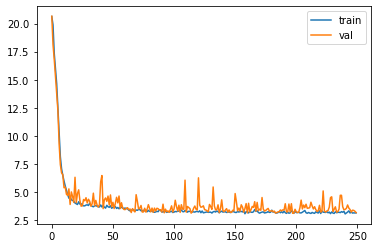

In [12]:
plt.plot(training_loss)
plt.plot(val_loss)
plt.legend(["train", "val"])
plt.show()

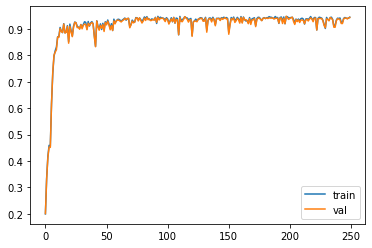

In [13]:
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.legend(["train", "val"])
plt.show()

In [14]:
val_accuracy[-1]

0.94304

In [15]:
train_accuracy[-1]

0.94448